The objective of this notebook is to answer the following questions:
1. Which factors influence a candidate in getting placed?

2. Which degree specialization is much demanded by corporate?

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import math 
import warnings

In [4]:
df = pd.read_csv("Placement_Data.csv")

df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


The "salary column" has some missing values. This could be due to unplaced students but let's make sure that placed students have their salaries listed.

In [6]:
df.query("status == 'placed'")["salary"].isnull().any() #checking for missing salaries

False

In [7]:
df.shape

(215, 15)

In [8]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


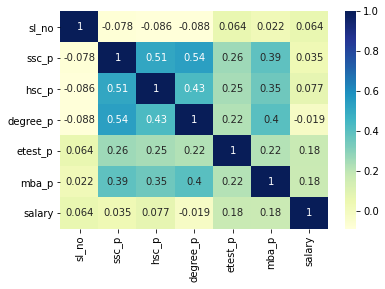

In [10]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [11]:
df["gender"].value_counts()

M    139
F     76
Name: gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


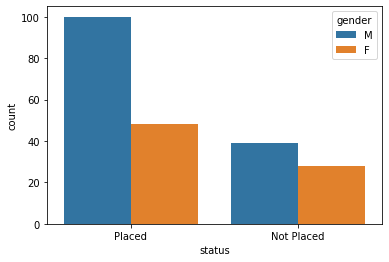

In [13]:
#Analysing gender bias 
ax= sns.countplot("status" , data = df, hue = "gender")

Taking a look at the influence of school Board in student placements (Question 2):

In [14]:
df['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [15]:
df['hsc_b'].value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

In [16]:
#Creating a filter for SSC Central board 
ssc_central = df.ssc_b == "Central"

#Creating a filter for HSC Central board 
hsc_central = df.hsc_b == "Central"

both = ssc_central & hsc_central
neither = ~ssc_central & ~hsc_central

df.groupby(["ssc_b", "hsc_b"]).status.value_counts().reset_index(name="count")

,ssc_b,hsc_b,status,count
0,Central,Central,Placed,53
1,Central,Central,Not Placed,24
2,Central,Others,Placed,25
3,Central,Others,Not Placed,14
4,Others,Central,Placed,4
5,Others,Central,Not Placed,3
6,Others,Others,Placed,66
7,Others,Others,Not Placed,26


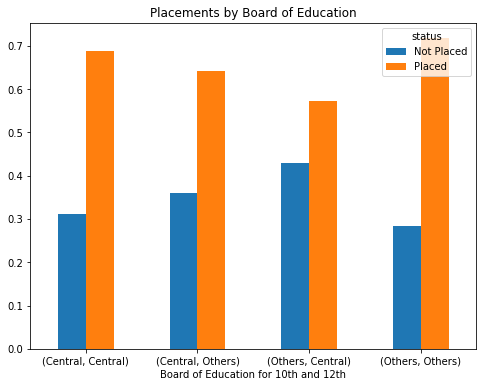

In [17]:
#board vs placement rate 
grouped_data = df.groupby(["ssc_b", "hsc_b"]).status.value_counts(normalize=True).unstack(2)
grouped_data.plot.bar(title = "Placements by Board of Education", rot = 0, figsize = (8,6)).set_xlabel("Board of Education for 10th and 12th");

Since (Others, Central) and (Central, Others) have significantly fewer samples than the other two, we will focus on (Central, Central) and (Others, Others) and see if it has any noticeable advantages over the other.

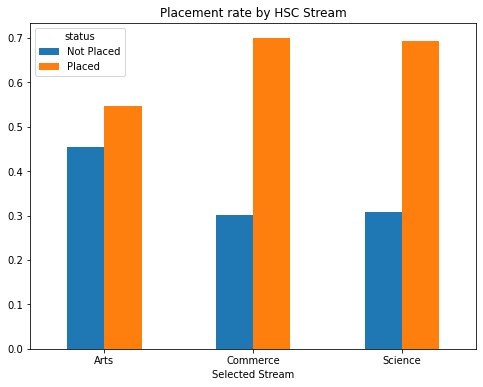

In [18]:
#How does streams play a role in the student placements 
df.groupby("hsc_s").status.value_counts(normalize=True).unstack(1).plot.bar( title = "Placement rate by HSC Stream", rot=0, figsize = (8,6)).set_xlabel("Selected Stream");

Taking a look at the influence of exam percentages in student placements:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Se

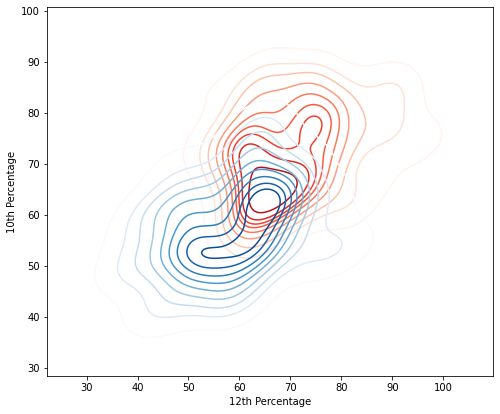

In [30]:
placed = df["status"] == "Placed"
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
sns.kdeplot(df[placed].hsc_p, df[placed].ssc_p, cmap="Reds",shade_lowest=False)
sns.kdeplot(df[~placed].hsc_p, df[~placed].ssc_p,  cmap ="Blues", shade_lowest=False)
plt.xlabel("12th Percentage")
plt.ylabel("10th Percentage")
plt.show();

From the chart, we can tell that students who got placed (orange) appear to have scored better in both their tenth and twelfth than unplaced students (blue).

Placement Status vs Different Degree Holders:

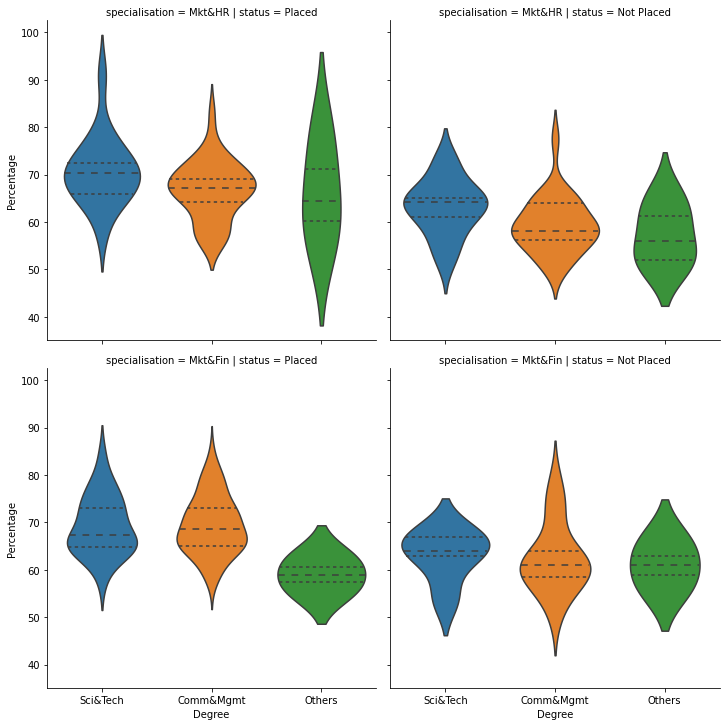

In [31]:
g = sns.catplot(kind = 'violin', data = df, x = 'degree_t', y = 'degree_p' , col = 'status',
              inner = 'quartile',  row = 'specialisation');
g.set_axis_labels('Degree', 'Percentage');

We can conclude that having a higher percentage certainly translates to a higher chance of placement.

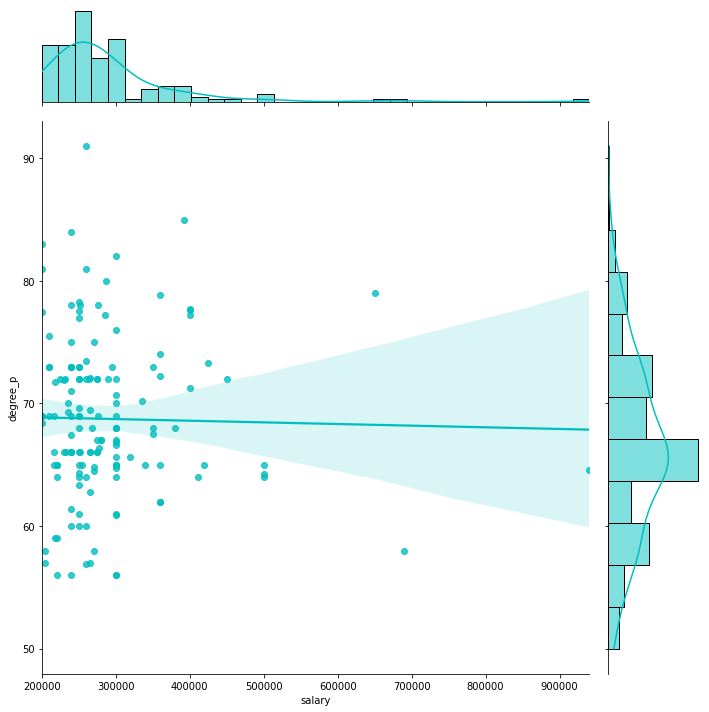

In [32]:
sns.jointplot(x='salary',y='degree_p',data=df,kind='reg',height=10,color='c')

Taking a look at the influence of work experience in student placements:

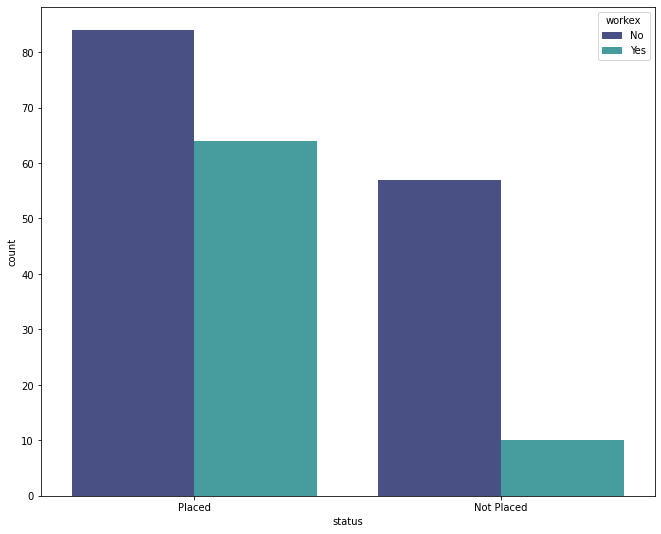

In [22]:
plt.figure(figsize=(11,9))
sns.countplot(x='status',hue='workex',data=df,palette='mako')

In [28]:
workex=df.groupby(['workex','status']).ssc_p.count().reset_index(name='count')
workex['percent']=round(workex['count']/workex.groupby('workex')['count'].transform('sum')*100,2)
workex

,workex,status,count,percent
0,No,Not Placed,57,40.43
1,No,Placed,84,59.57
2,Yes,Not Placed,10,13.51
3,Yes,Placed,64,86.49


We can tell, from the table above, that 86% of students having prior work experience get placed.

#Salaries vs Gender

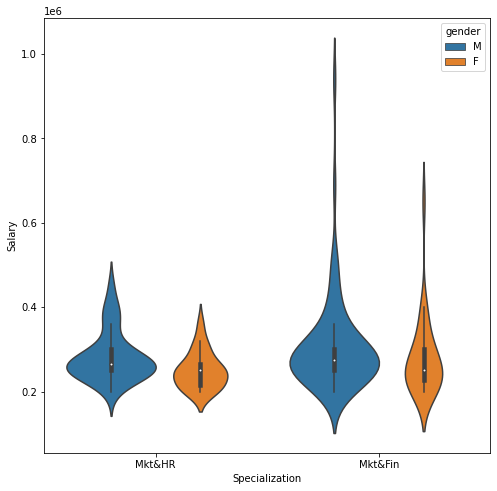

In [24]:
plt.subplots(figsize=(8,8))
sns.violinplot(y = "salary", x="specialisation", hue = "gender", data=df, scale="count");
plt.xlabel("Specialization")
plt.ylabel("Salary")
plt.show();

The chart above indicates that the males are generally given higher salaries than females.

#Data Preparation
I begin by creating an element matrix X that contains all of the items from the dataset except Salary and Status. I also remove the index number because it may lead to overfitting and adds no useful information to the dataset.

Then I continued to One-hot encode for the all-out factors, leaving the first ones out. Because the majority of the straight-out parts only had two or three noteworthy attributes, the final dataset was not overly swollen and only had 14 segments for the model to work with.

In [33]:
from sklearn.preprocessing import StandardScaler

X = df.drop(["salary", "status", "sl_no"], axis = 1)
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
cols = X.columns
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = cols
y = df["status"]

In [34]:
X.head(5)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,-0.028087,2.268812,-1.140102,-1.291091,-0.597647,0.739434,1.082459,0.800763,0.950082,-0.856663,-0.23221,1.626059,-0.724446,1.123903
1,1.113369,1.103448,1.513267,1.087157,0.687620,0.739434,-0.923823,0.800763,-1.052541,1.167321,-0.23221,1.626059,1.380364,-0.889757
2,-0.213238,0.153313,-0.322843,0.218908,-0.769474,0.739434,-0.923823,-1.248809,-1.052541,-0.856663,-0.23221,-0.614984,-0.724446,-0.889757
3,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396,0.739434,-0.923823,-1.248809,-1.052541,1.167321,-0.23221,1.626059,-0.724446,1.123903
4,1.712332,0.668391,0.943909,1.864806,-1.164676,0.739434,-0.923823,-1.248809,0.950082,-0.856663,-0.23221,-0.614984,-0.724446,-0.889757


Making use of KFold cross validation so that the final score would be a better representation of real-world performance, since original dataset is too small in samples to do a traditional train-test split with, and could create unnecessary bias.

In [37]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold

scores = []
kfold = KFold(n_splits=5, random_state = 42, shuffle=True)
for train_index, test_index in kfold.split(X):
    model = LinearSVC()
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train);
    scores.append(model.score(X_test, y_test))
    
print(f"CV score is: {sum(scores)/len(scores)}")

CV score is: 0.8651162790697674


Following the fitting of a linear SVM to predict whether or not a student will be placed, the results were reasonably good, with a test accuracy of 86.5 percent after some data preprocessing.